In [1]:

import numpy as np 
import pandas as pd 
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
Higgs_data=pd.read_csv('higgs-boson/training.csv')
print(Higgs_data.isnull().sum())


EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [3]:
Higgs_data1=pd.read_csv('higgs-boson/test.csv')
print(Higgs_data1.isnull().sum())
Higgs_data1

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,1.536,-1.404,-999.000,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,1.777,-1.204,-999.000,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,1.096,-1.408,-999.000,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,0.819,-1.382,-999.000,51.741,0.388,-1.408,42.371,-0.295,2.148,25.131,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,1.713,-0.913,0.004,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549995,899995,309.530,28.185,170.795,99.349,-999.000,-999.000,-999.000,3.061,2.367,212.640,0.708,1.346,-999.000,67.429,0.657,-2.560,47.761,-1.372,1.431,61.754,1.956,177.103,1,97.451,-1.759,-0.733,-999.000,-999.000,-999.000,97.451
549996,899996,105.653,5.096,77.256,33.040,-999.000,-999.000,-999.000,2.693,33.040,62.279,0.948,0.551,-999.000,31.964,0.162,-2.624,30.315,-1.404,-0.432,12.670,-0.172,130.730,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
549997,899997,-999.000,69.470,51.766,1.189,-999.000,-999.000,-999.000,1.615,1.189,72.350,0.752,-1.398,-999.000,41.290,0.559,-2.156,31.060,0.578,2.512,49.505,0.336,71.646,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
549998,899998,107.254,13.500,79.833,50.801,-999.000,-999.000,-999.000,2.026,7.993,135.762,1.087,-0.288,-999.000,44.403,-0.504,1.710,48.260,-0.096,-0.274,7.741,-0.988,243.371,1,43.099,-0.352,-2.594,-999.000,-999.000,-999.000,43.099


In [4]:
Higgs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [6]:
X = Higgs_data.drop([ 'Label','EventId'],axis=1,inplace=False)
y = pd.get_dummies(Higgs_data.Label)

In [7]:
print(X.isnull().sum())
print(y.isnull().sum())

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_all_pt                 0
Weight    

In [8]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,shuffle=True,random_state=41)

In [13]:
model=Sequential()
model.add(Input(X.shape[1],batch_size=32) )
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2)) 
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(y.shape [1],activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'] )
history = model.fit(X.values,y.values,validation_split=0.2,batch_size=32,verbose=1,shuffle = False,epochs =10)

Epoch 1/10
6250/6250 [==============================] - 16s 3ms/step - loss: 0.6401 - accuracy: 0.7011 - val_loss: 0.5450 - val_accuracy: 0.7178
Epoch 2/10
6250/6250 [==============================] - 17s 3ms/step - loss: 0.5297 - accuracy: 0.7293 - val_loss: 0.5088 - val_accuracy: 0.7384
Epoch 3/10
6250/6250 [==============================] - 17s 3ms/step - loss: 0.5252 - accuracy: 0.7477 - val_loss: 0.5071 - val_accuracy: 0.7602
Epoch 4/10
6250/6250 [==============================] - 17s 3ms/step - loss: 0.5089 - accuracy: 0.7559 - val_loss: 0.5046 - val_accuracy: 0.7608
Epoch 5/10
6250/6250 [==============================] - 16s 3ms/step - loss: 0.5004 - accuracy: 0.7596 - val_loss: 0.4873 - val_accuracy: 0.7685
Epoch 6/10
6250/6250 [==============================] - 15s 2ms/step - loss: 0.2984 - accuracy: 0.8598 - val_loss: 0.1101 - val_accuracy: 0.9608
Epoch 7/10
6250/6250 [==============================] - 15s 2ms/step - loss: 0.1509 - accuracy: 0.9437 - val_loss: 0.0861 - val_ac

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (32, 64)                  2048      
_________________________________________________________________
dense_1 (Dense)              (32, 64)                  4160      
_________________________________________________________________
dropout (Dropout)            (32, 64)                  0         
_________________________________________________________________
dense_2 (Dense)              (32, 64)                  4160      
_________________________________________________________________
dense_3 (Dense)              (32, 32)                  2080      
_________________________________________________________________
dense_4 (Dense)              (32, 512)                 16896     
_________________________________________________________________
dense_5 (Dense)              (32, 2)                   1

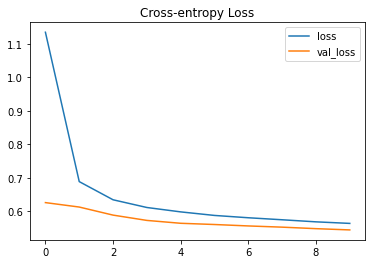

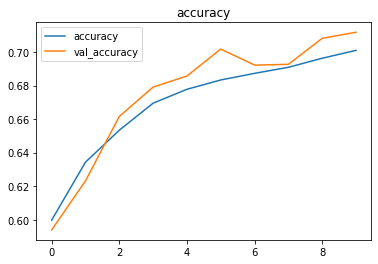

In [11]:
history_graph = pd.DataFrame(history.history)
history_graph.loc[:, ['loss','val_loss']].plot(title='Cross-entropy Loss')
history_graph.loc[:, ['accuracy', 'val_accuracy']].plot(title='accuracy');
